# indexing methods

In [1]:
%matplotlib inline
pd.set_option('max_rows',12)

In [2]:
def f_ix(df):
    df.ix[0,0] = 0
def f_loc(df):
    df.loc[0,'A'] = 0
def f_iloc(df):
    df.iloc[0,0] = 0
def f_at(df):
    df.at[0,'A'] = 0
def f_iat(df):
    df.iat[0,0] = 0
def f_numpy(df):
    df.values[0,0] = 0
def cf():    
    return pd.DataFrame(np.random.randn(100000,2),columns=list('AB'))

In [3]:
t = {}

In [4]:
df = cf()
x = %timeit -o -n 100 -r 1 f_ix(df)
t['ix'] = x.best

100 loops, best of 1: 199 µs per loop


In [5]:
df = cf()
x = %timeit -o -n 100 -r 1 f_loc(df)
t['loc'] = x.best

100 loops, best of 1: 308 µs per loop


In [6]:
df = cf()
x = %timeit -o -n 100 -r 1 f_iloc(df)
t['iloc'] = x.best

100 loops, best of 1: 339 µs per loop


In [7]:
df = cf()
x = %timeit -o -n 100 -r 1 f_at(df)
t['at'] = x.best

100 loops, best of 1: 35.6 µs per loop


In [8]:
df = cf()
x = %timeit -o -n 100 -r 1 f_iat(df)
t['iat'] = x.best

100 loops, best of 1: 10 µs per loop


In [9]:
df = cf()
x = %timeit -o -n 100 -r 1 f_numpy(df)
t['numpy'] = x.best

100 loops, best of 1: 9.01 µs per loop


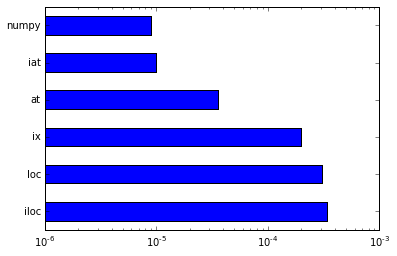

In [10]:
Series(t).sort_values(ascending=False).plot.barh(log=True)

# does this matter

In [11]:
def f1(df):
    na = df.values
    for i in xrange(len(df)):
        na[i,0] = 0
def f2(df):
    for i in xrange(len(df)):
        df.iat[i,0] = 0
def f3(df):
    df.iloc[:,0] = 0

In [12]:
t = {}

In [13]:
df = cf()
x = %timeit -o -r 1 f1(df)
t['f1'] = x.best

100 loops, best of 1: 13.7 ms per loop


In [14]:
df = cf()
x = %timeit -o -r 1 f2(df)
t['f2'] = x.best

1 loops, best of 1: 796 ms per loop


In [15]:
df = cf()
x = %timeit -o -r 1 f3(df)
t['f3'] = x.best

1000 loops, best of 1: 766 µs per loop


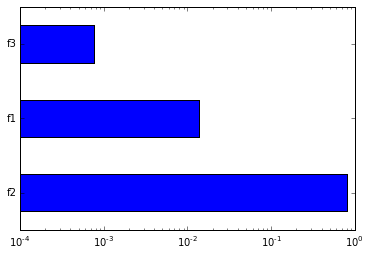

In [18]:
Series(t).sort_values(ascending=False).plot.barh(log=True)